# INCOME CLASS PREDICTION USING MACHINE LEARING

Hello all, for this classification task I have used the Census Income Dataset (Both data and test set) from UCI <br>
(https://archive.ics.uci.edu/ml/datasets/census+income)

In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.under_sampling import OneSidedSelection
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize']=(16, 8.27) #set graphs size to A4 dimensions
sns.set_style('darkgrid')
sns.set(font_scale = 1.4)

In [2]:
#import train and test set from UCI links

train = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 
              'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train.columns = col_labels
test.columns = col_labels

# Exploratory Data Analysis

Let's get deeper and exploring the data

###### TRAIN SET

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
#find out numerical and categorical features for train set

numerical_features=[feature for feature in train.columns if train[feature].dtype!='O']
categorical_features=[feature for feature in  train.columns if  train[feature].dtype=='O' and feature!='wage_class']

print('categorical features: ''\n',categorical_features)
print('\n')
print('numerical features: ''\n',numerical_features)

categorical features: 
 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


numerical features: 
 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [7]:
#Check for missing values
for feature in train.columns:
    print(feature,':', train[feature].isnull().sum())

age : 0
workclass : 0
fnlwgt : 0
education : 0
education_num : 0
marital_status : 0
occupation : 0
relationship : 0
race : 0
sex : 0
capital_gain : 0
capital_loss : 0
hours_per_week : 0
native_country : 0
wage_class : 0


In [8]:
#Find out distinct values for each numerical feature
for feature in numerical_features:
    print(feature,':', train[feature].nunique())

age : 73
fnlwgt : 21648
education_num : 16
capital_gain : 119
capital_loss : 92
hours_per_week : 94


In [9]:
#Find out distinct values for each categorical feature
for feature in categorical_features:
    print(feature,':', train[feature].nunique())

workclass : 9
education : 16
marital_status : 7
occupation : 15
relationship : 6
race : 5
sex : 2
native_country : 42


In [10]:
#for each categorical value we calculate relative frequency of unique classes.
for feature in categorical_features:
    freq=train[feature].value_counts('f').rename_axis(feature).reset_index(name='relative frequency')
    print('\n')
    print(freq)



           workclass  relative frequency
0            Private            0.697030
1   Self-emp-not-inc            0.078038
2          Local-gov            0.064279
3                  ?            0.056386
4          State-gov            0.039864
5       Self-emp-inc            0.034274
6        Federal-gov            0.029483
7        Without-pay            0.000430
8       Never-worked            0.000215


        education  relative frequency
0         HS-grad            0.322502
1    Some-college            0.223918
2       Bachelors            0.164461
3         Masters            0.052916
4       Assoc-voc            0.042443
5            11th            0.036086
6      Assoc-acdm            0.032769
7            10th            0.028654
8         7th-8th            0.019840
9     Prof-school            0.017690
10            9th            0.015786
11           12th            0.013298
12      Doctorate            0.012684
13        5th-6th            0.010227
14        1st-4t

In [11]:
#Check for imbalanced target (In our case 76% are in class <=50K and 24% >50K)
train['wage_class'].value_counts('f') 

 <=50K    0.75919
 >50K     0.24081
Name: wage_class, dtype: float64

###### Now let's do some graphs for train set in order to find key relationships !!!

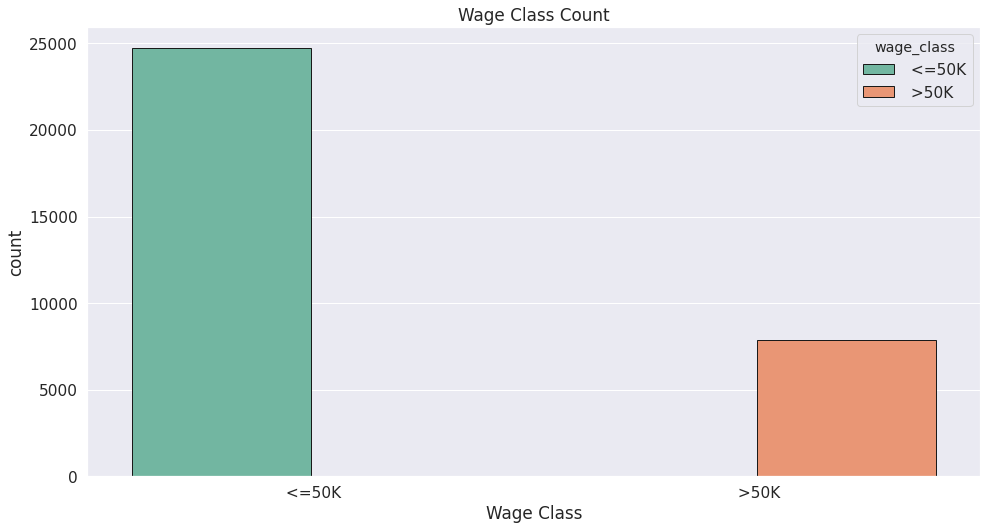

In [12]:
ax=sns.countplot(train['wage_class'],hue=train['wage_class'],edgecolor='k',palette='Set2')
ax.set_title('Wage Class Count')
ax.set_xlabel('Wage Class')
plt.show()

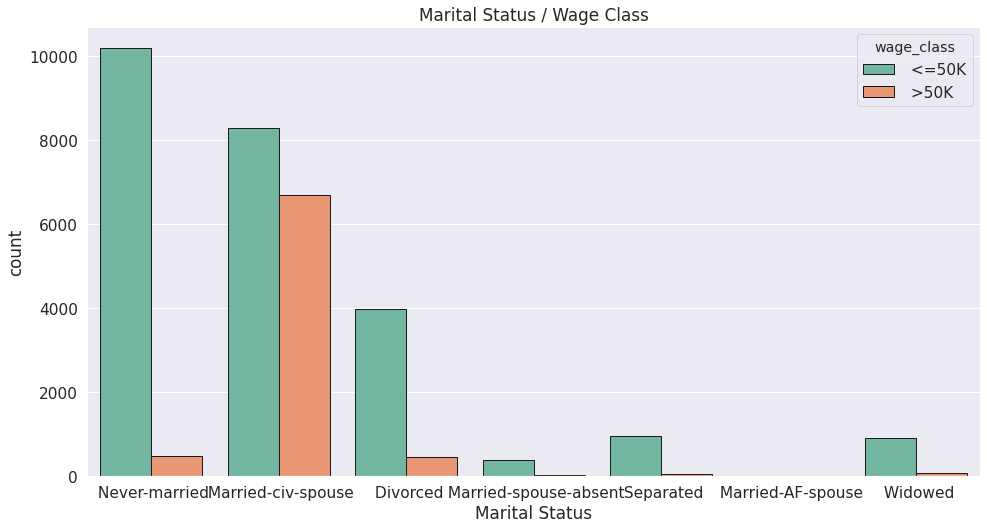

In [13]:
ax=sns.countplot(train['marital_status'], hue=train['wage_class'],edgecolor='k',palette='Set2')
ax.set_title('Marital Status / Wage Class')
ax.set_xlabel('Marital Status')
plt.show()

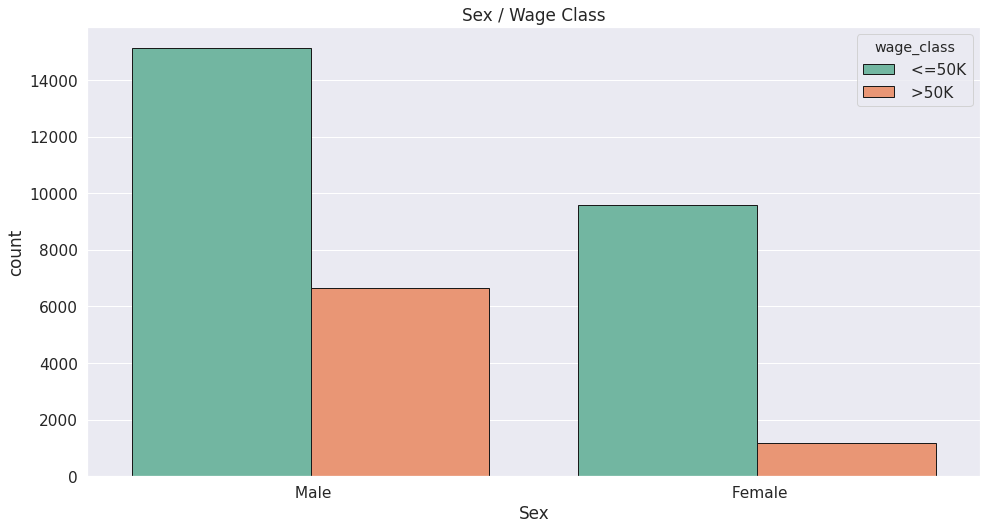

In [14]:
ax=sns.countplot(train['sex'], hue=train['wage_class'],edgecolor='k',palette='Set2')
ax.set_title('Sex / Wage Class')
ax.set_xlabel('Sex')
plt.show()

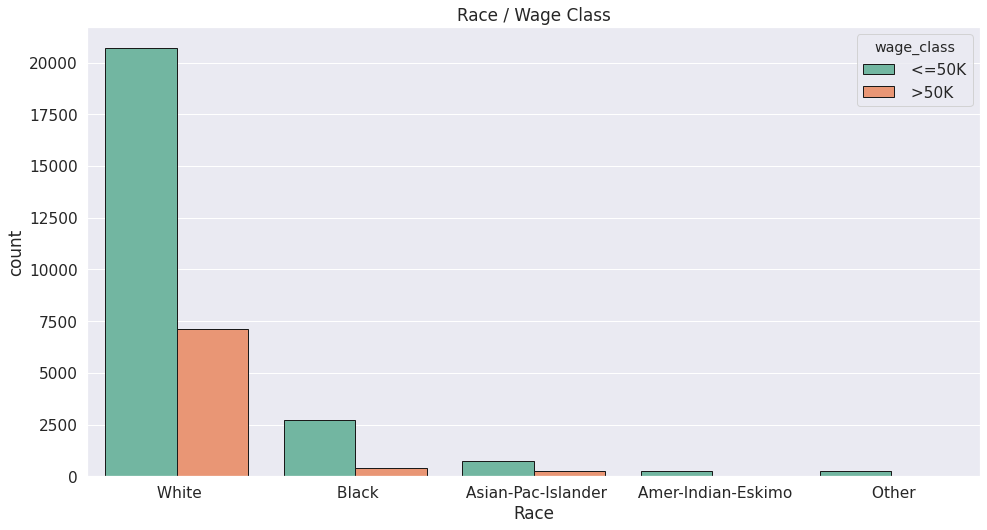

In [15]:
ax=sns.countplot(train['race'], hue=train['wage_class'],edgecolor='k',palette='Set2')
ax.set_title('Race / Wage Class')
ax.set_xlabel('Race')
plt.show()

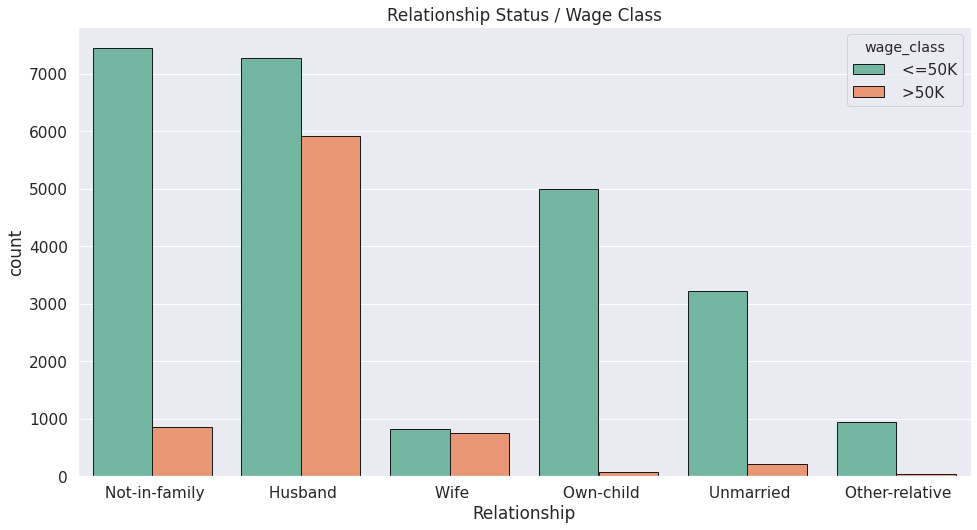

In [16]:
ax=sns.countplot(train['relationship'], hue=train['wage_class'],edgecolor='k',palette='Set2')
ax.set_title('Relationship Status / Wage Class')
ax.set_xlabel('Relationship')
plt.show()

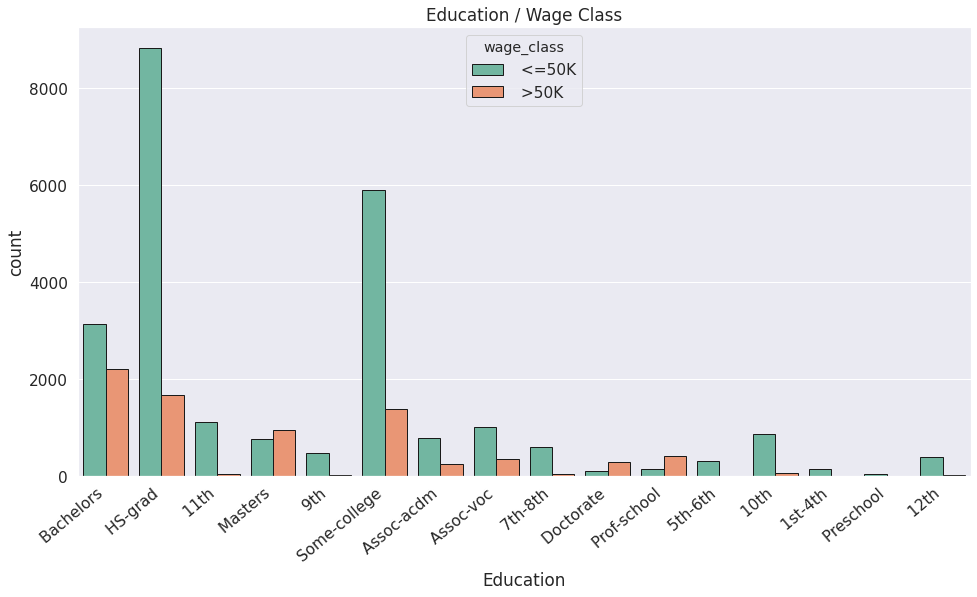

In [17]:
ax=sns.countplot(train['education'], hue=train['wage_class'],edgecolor='k',palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Education / Wage Class')
ax.set_xlabel('Education')
plt.show()

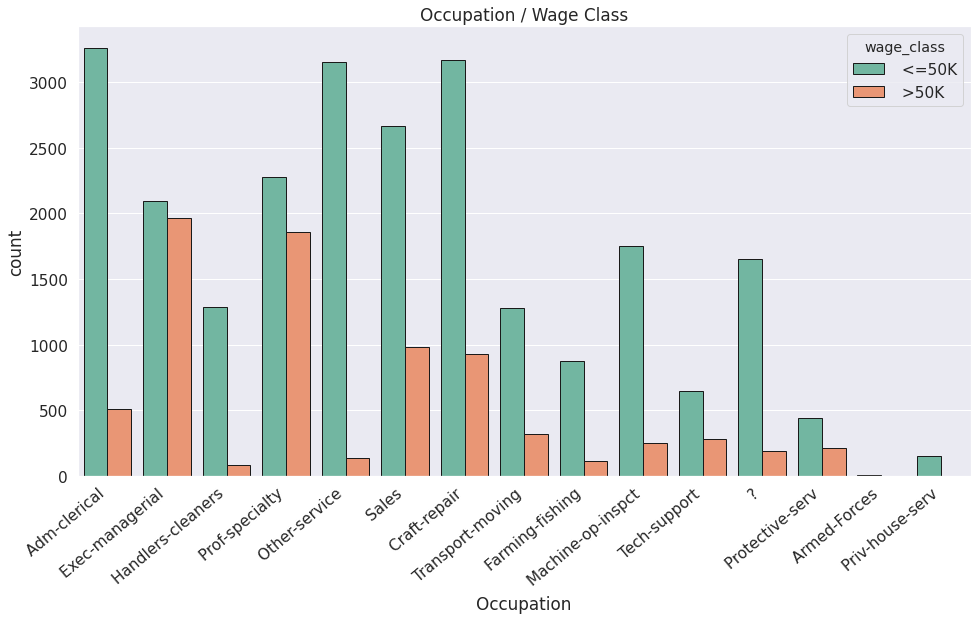

In [18]:
ax=sns.countplot(train['occupation'], hue=train['wage_class'],edgecolor='k',palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Occupation / Wage Class')
ax.set_xlabel('Occupation')
plt.show()

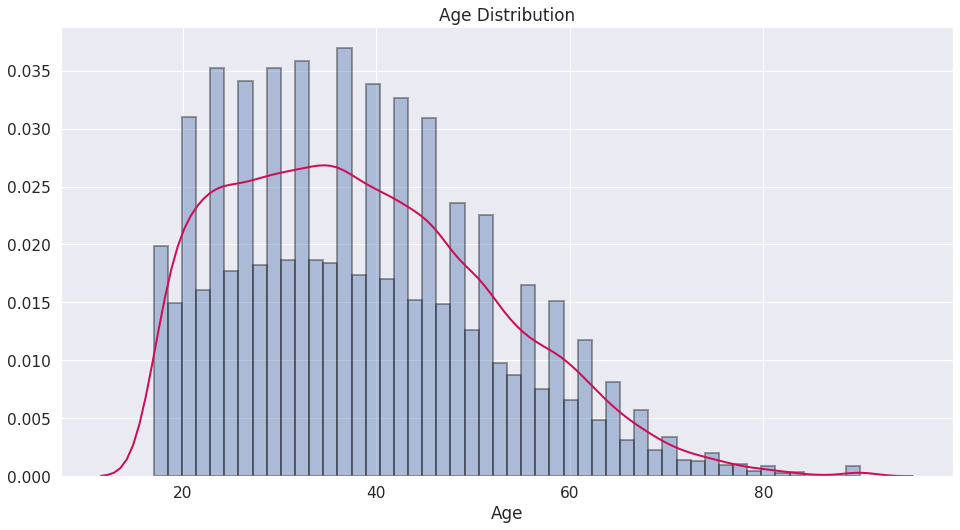

In [19]:
ax=sns.distplot(train['age'],hist_kws=dict(edgecolor="k", linewidth=2),kde_kws={"color": "#ce0d55", "lw": 2})
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
plt.show()

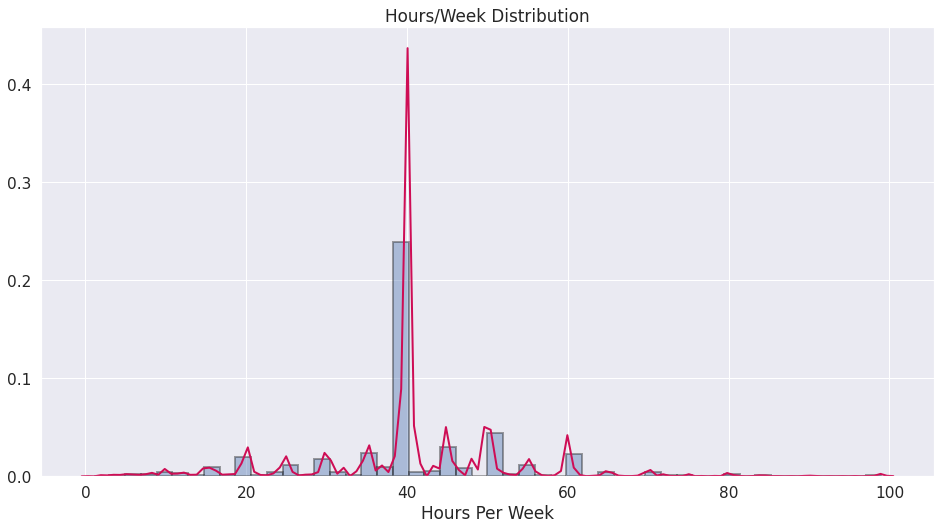

In [20]:
ax=sns.distplot(train['hours_per_week'],hist_kws=dict(edgecolor="k", linewidth=2),kde_kws={"color": "#ce0d55", "lw": 2})
ax.set_title('Hours/Week Distribution')
ax.set_xlabel('Hours Per Week')
plt.show()

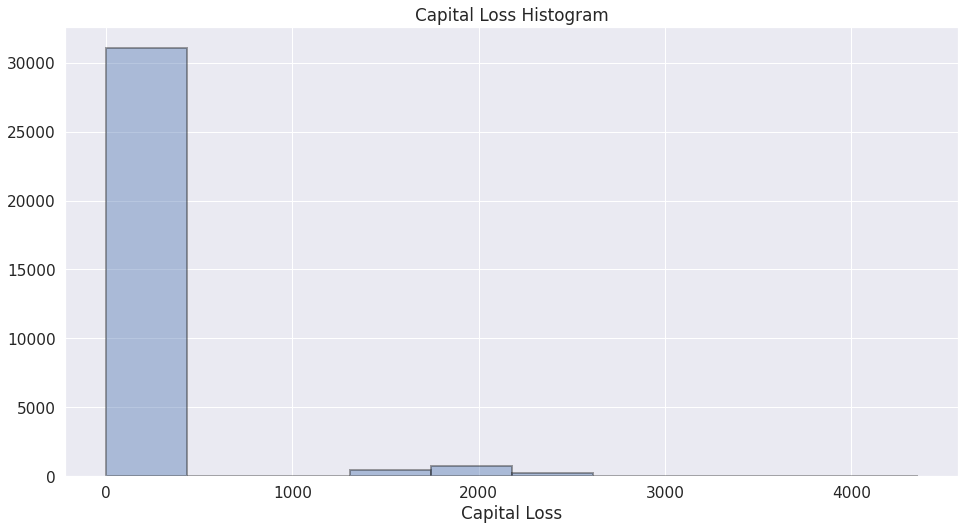

In [21]:
ax=sns.distplot(train['capital_loss'],bins=10,kde=False,hist_kws=dict(edgecolor="k", linewidth=2))
ax.set_title('Capital Loss Histogram')
ax.set_xlabel('Capital Loss')
plt.show()

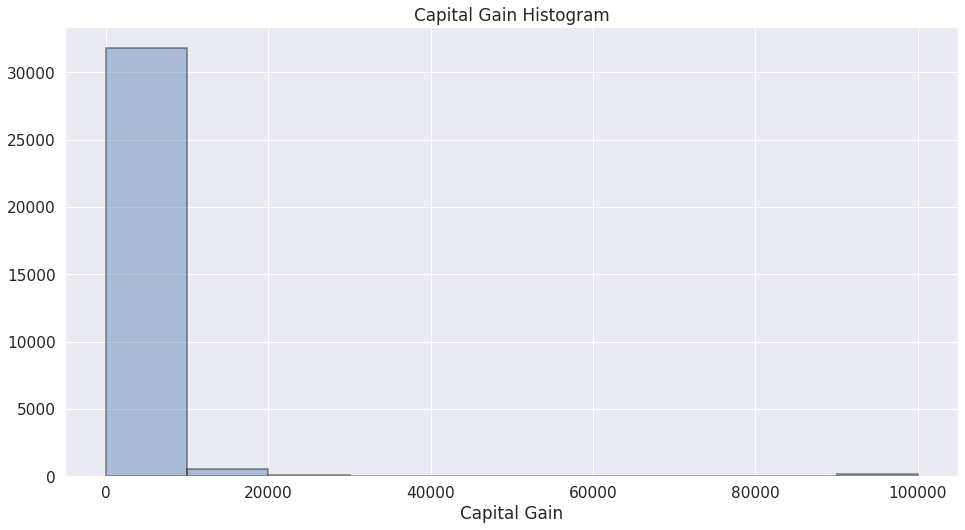

In [22]:
ax=sns.distplot(train['capital_gain'],bins=10,kde=False,hist_kws=dict(edgecolor="k", linewidth=2))
ax.set_title('Capital Gain Histogram')
ax.set_xlabel('Capital Gain')
plt.show()

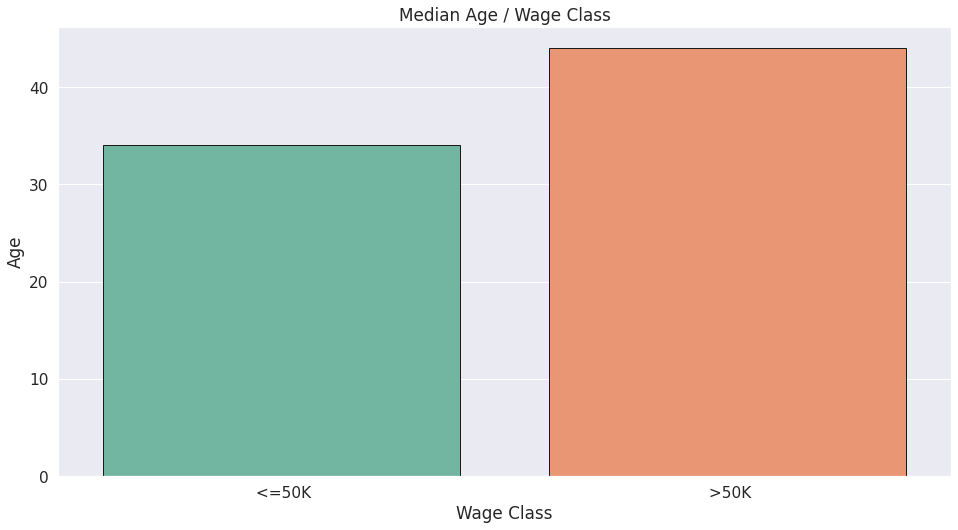

In [23]:
#median age for each wage_class
ax=sns.barplot(train.groupby('wage_class')['age'].median().index,train.groupby('wage_class')['age'].median().values,
               edgecolor='k', palette='Set2')
ax.set_ylabel('Age')
ax.set_xlabel('Wage Class')
ax.set_title('Median Age / Wage Class')
plt.show()

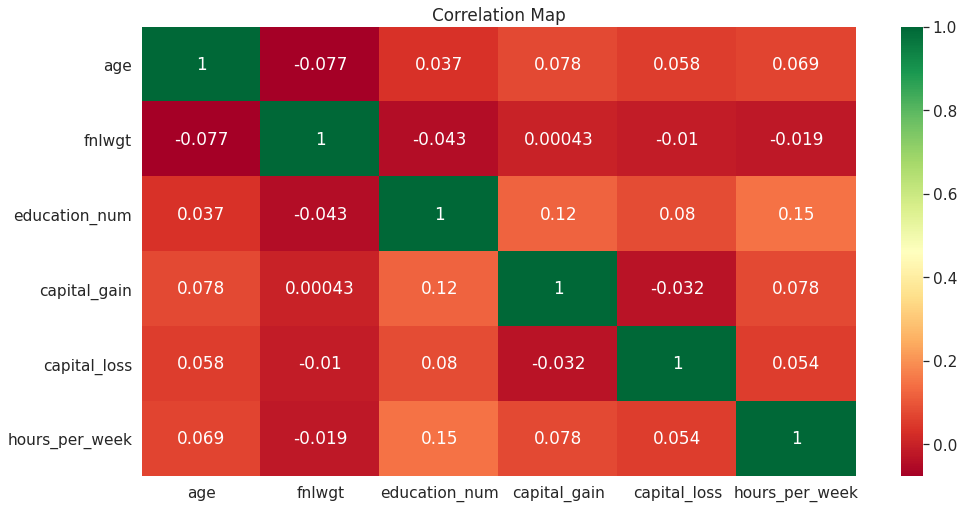

In [24]:
corr_train=train.copy()
for feature in categorical_features:
    corr_train.drop(feature,axis=1,inplace=True)

    
ax=sns.heatmap(corr_train.corr(), cmap='RdYlGn',annot=True)
ax.set_title('Correlation Map')
plt.show()

###### TEST SET

Now we have to follow the same procedure for the test set in order to assure that both train set and test set come from same distribution

In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  wage_class      16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [26]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [27]:
train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [28]:
#find out numerical and categorical features for test set

numerical_features_test=[feature for feature in test.columns if test[feature].dtype!='O']
categorical_features_test=[feature for feature in  test.columns if  test[feature].dtype=='O' and feature!='wage_class']

print('categorical features: ''\n',categorical_features_test)
print('\n')
print('numerical features: ''\n',numerical_features_test)

categorical features: 
 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


numerical features: 
 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [29]:
#Check for missing values
for feature in test.columns:
    print(feature,':', test[feature].isnull().sum())

age : 0
workclass : 0
fnlwgt : 0
education : 0
education_num : 0
marital_status : 0
occupation : 0
relationship : 0
race : 0
sex : 0
capital_gain : 0
capital_loss : 0
hours_per_week : 0
native_country : 0
wage_class : 0


In [30]:
#Find out distinct values for each numerical feature
for feature in numerical_features_test:
    print(feature,':', test[feature].nunique())

age : 73
fnlwgt : 12787
education_num : 16
capital_gain : 113
capital_loss : 82
hours_per_week : 89


In [31]:
#Find out distinct values for each categorical feature
for feature in categorical_features_test:
    print(feature,':', test[feature].nunique())

workclass : 9
education : 16
marital_status : 7
occupation : 15
relationship : 6
race : 5
sex : 2
native_country : 41


In [32]:
#for each categorical value we calculate relative frequency of unique classes.
for feature in categorical_features_test:
    freq_test=test[feature].value_counts('f').rename_axis(feature).reset_index(name='relative frequency')
    print('\n')
    print(freq_test)



           workclass  relative frequency
0            Private            0.688533
1   Self-emp-not-inc            0.081138
2          Local-gov            0.064062
3                  ?            0.059149
4          State-gov            0.041951
5       Self-emp-inc            0.035563
6        Federal-gov            0.028991
7        Without-pay            0.000430
8       Never-worked            0.000184


        education  relative frequency
0         HS-grad            0.324489
1    Some-college            0.220318
2       Bachelors            0.163995
3         Masters            0.057367
4       Assoc-voc            0.041705
5            11th            0.039125
6      Assoc-acdm            0.032799
7            10th            0.028008
8         7th-8th            0.018979
9     Prof-school            0.015847
10            9th            0.014864
11           12th            0.013758
12      Doctorate            0.011117
13        5th-6th            0.010810
14        1st-4t

In [33]:
#Check for imbalanced target (In our case approx 76% are in class <=50K and  approx 24% >50K)
test['wage_class'].value_counts('f') 

 <=50K.    0.763774
 >50K.     0.236226
Name: wage_class, dtype: float64

###### Now let's do some graphs for test in order to find key relationships !!!

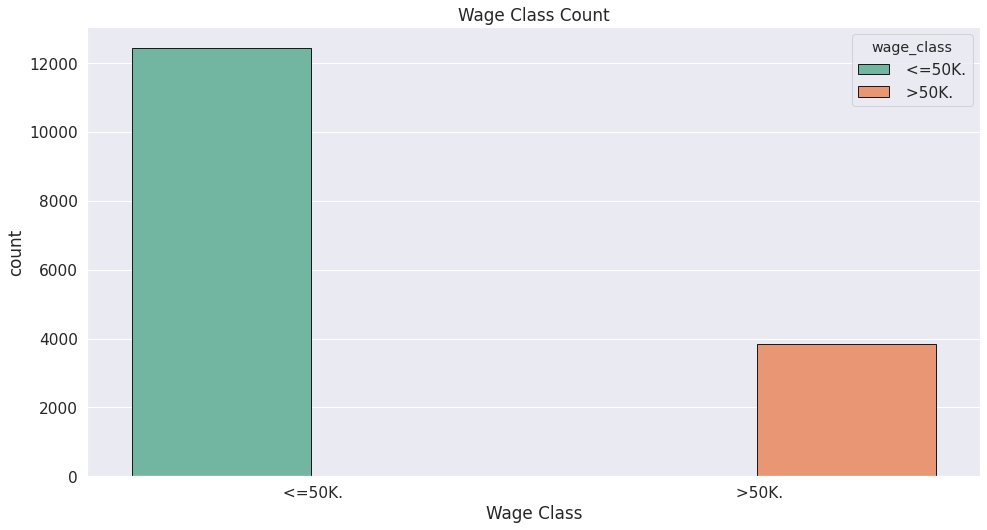

In [34]:
ax=sns.countplot(test['wage_class'],hue=test['wage_class'], edgecolor='k',palette='Set2')
ax.set_title('Wage Class Count')
ax.set_xlabel('Wage Class')
plt.show()

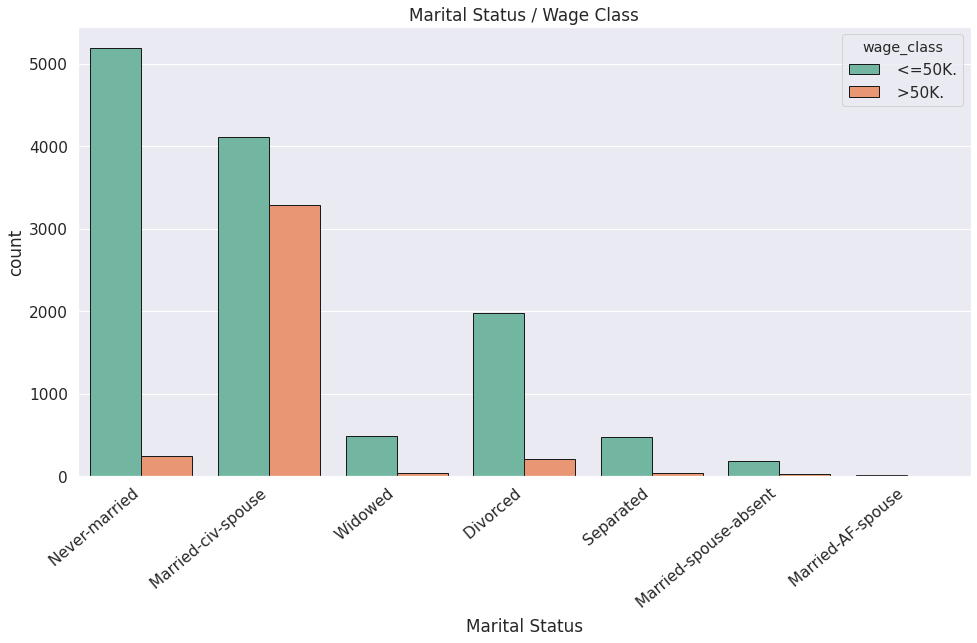

In [35]:
ax=sns.countplot(test['marital_status'], hue=test['wage_class'],edgecolor='k', palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Marital Status / Wage Class')
ax.set_xlabel('Marital Status')
plt.show()

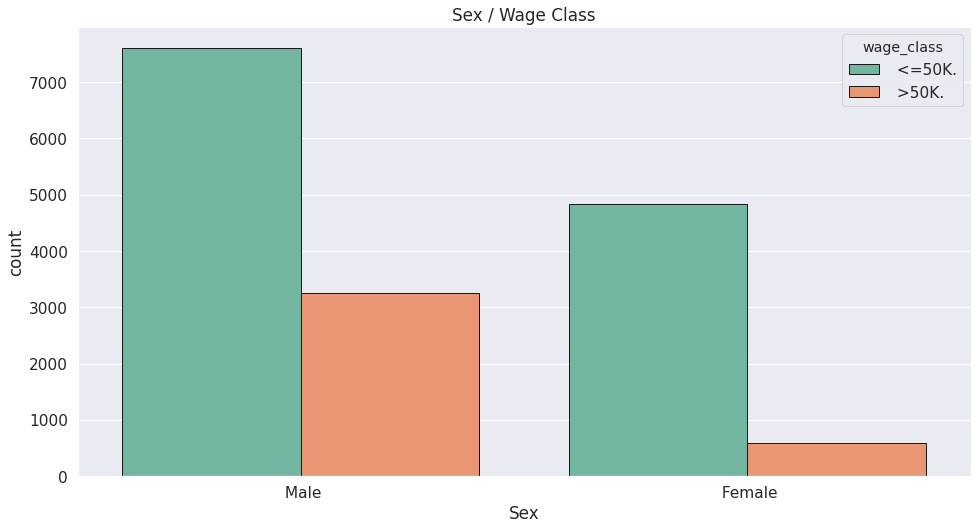

In [36]:
ax=sns.countplot(test['sex'], hue=test['wage_class'],edgecolor='k', palette='Set2')
ax.set_title('Sex / Wage Class')
ax.set_xlabel('Sex')
plt.show()

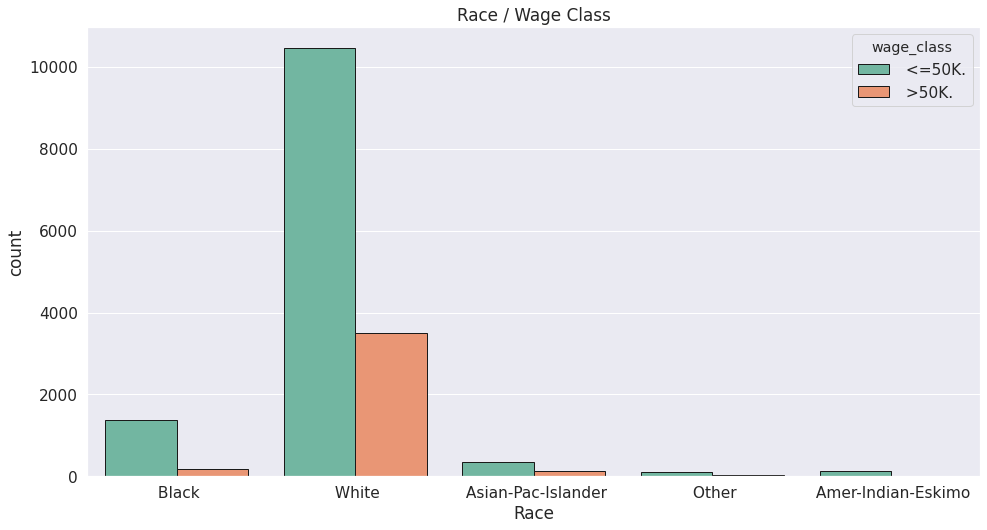

In [37]:
ax=sns.countplot(test['race'], hue=test['wage_class'],edgecolor='k', palette='Set2')
ax.set_title('Race / Wage Class')
ax.set_xlabel('Race')
plt.show()

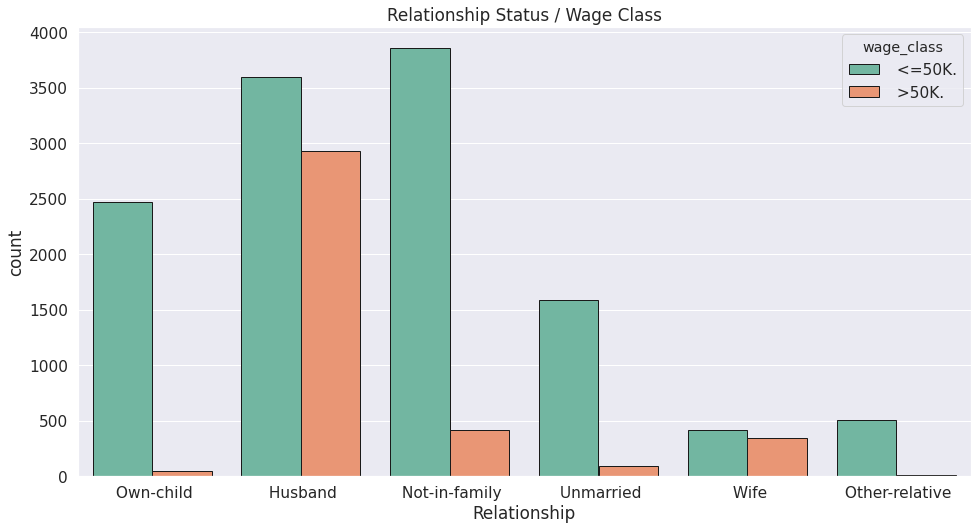

In [38]:
ax=sns.countplot(test['relationship'], hue=test['wage_class'],edgecolor='k', palette='Set2')
ax.set_title('Relationship Status / Wage Class')
ax.set_xlabel('Relationship')
plt.show()

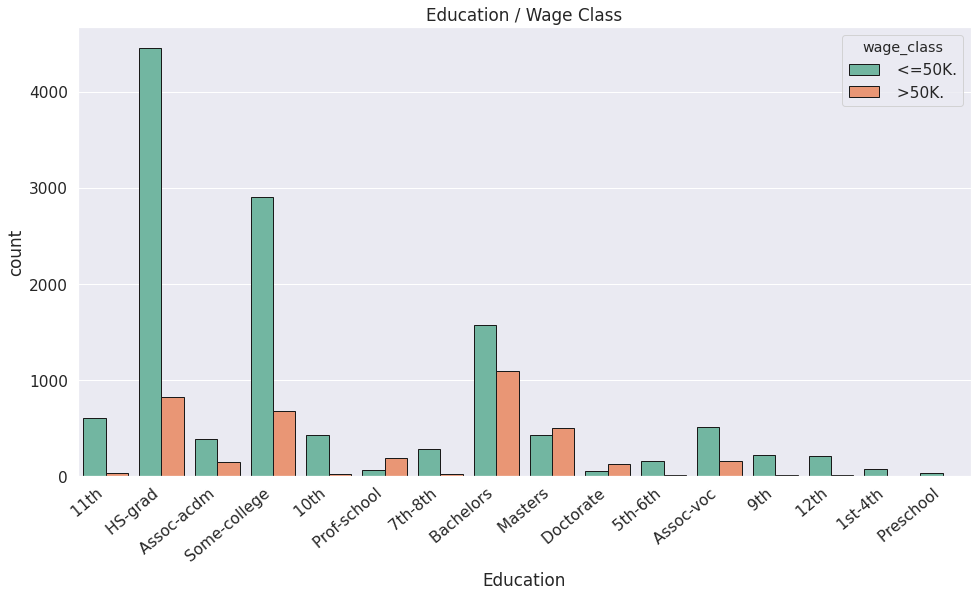

In [39]:
ax=sns.countplot(test['education'], hue=test['wage_class'],edgecolor='k', palette='Set2')
ax.set_title('Education / Wage Class')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Education')
plt.show()

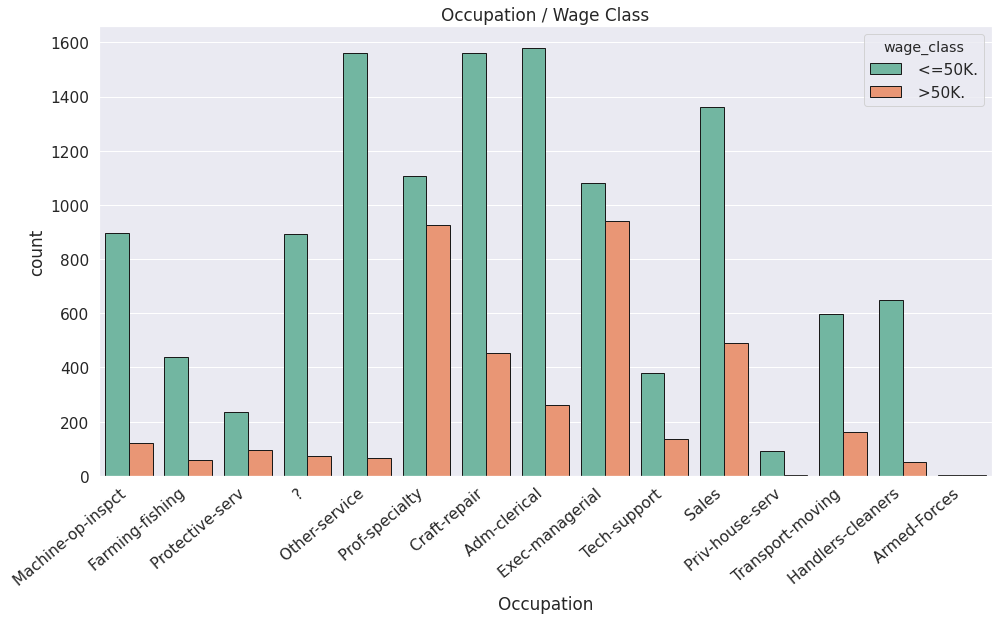

In [40]:
ax=sns.countplot(test['occupation'], hue=test['wage_class'],edgecolor='k', palette='Set2')
ax.set_title('Occupation / Wage Class')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Occupation')
plt.show()

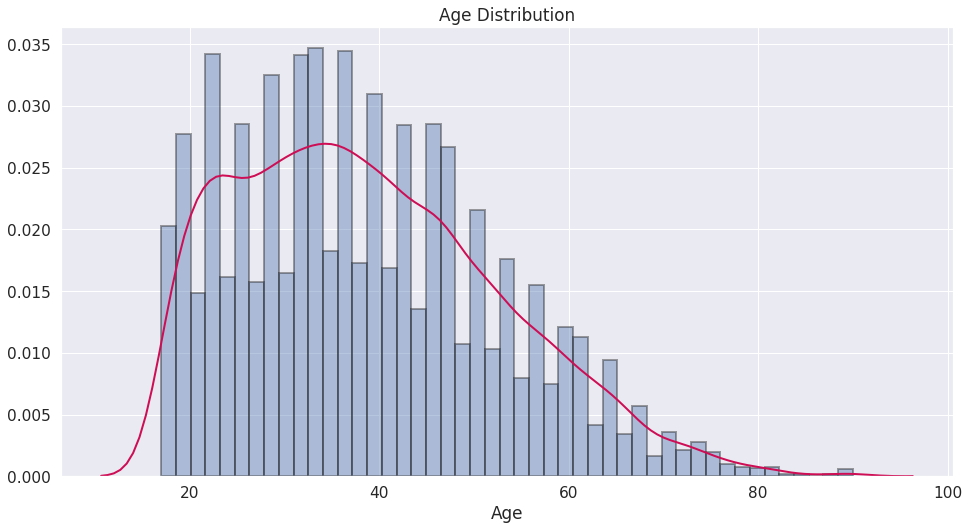

In [41]:
ax=sns.distplot(test['age'],hist_kws=dict(edgecolor="k", linewidth=2),kde_kws={"color": "#ce0d55", "lw": 2})
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
plt.show()

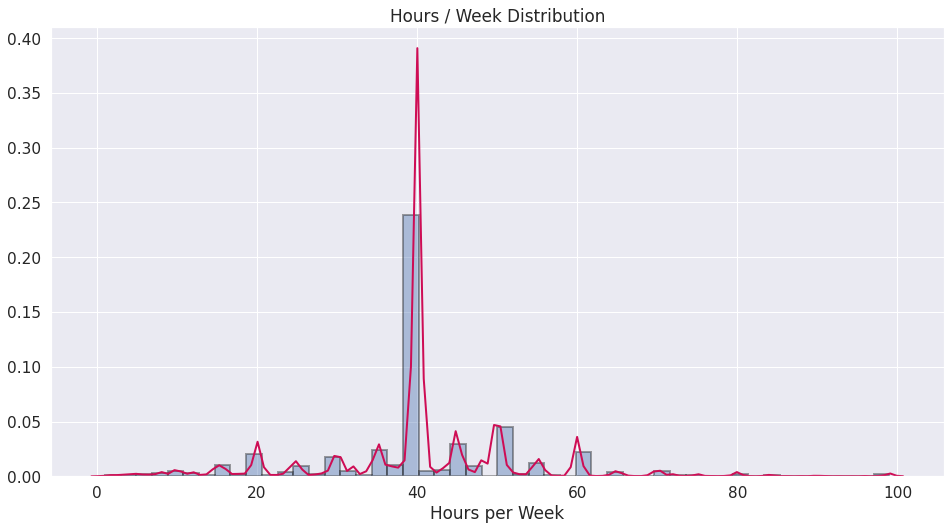

In [42]:
ax=sns.distplot(test['hours_per_week'],hist_kws=dict(edgecolor="k", linewidth=2),kde_kws={"color": "#ce0d55", "lw": 2})
ax.set_title('Hours / Week Distribution')
ax.set_xlabel('Hours per Week')
plt.show()

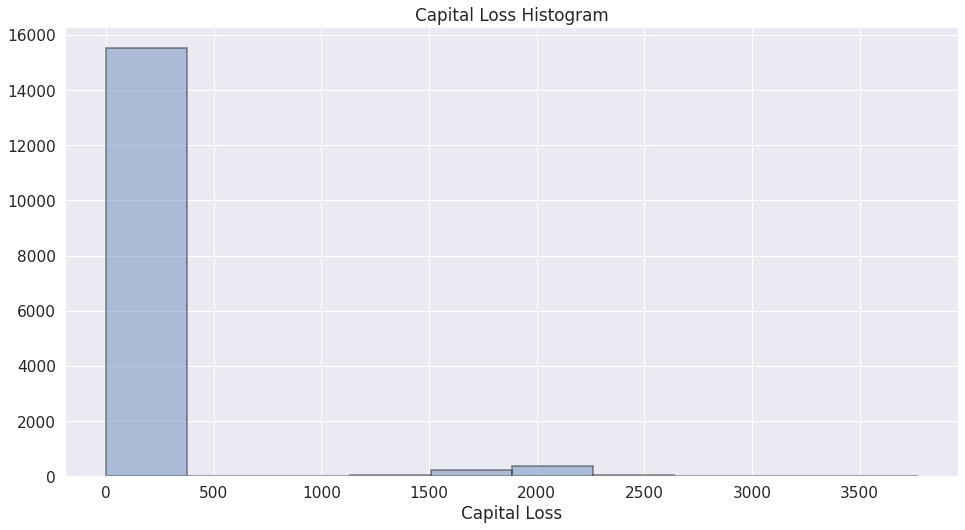

In [43]:
ax=sns.distplot(test['capital_loss'],bins=10,kde=False,hist_kws=dict(edgecolor="k", linewidth=2))
ax.set_title('Capital Loss Histogram')
ax.set_xlabel('Capital Loss')
plt.show()

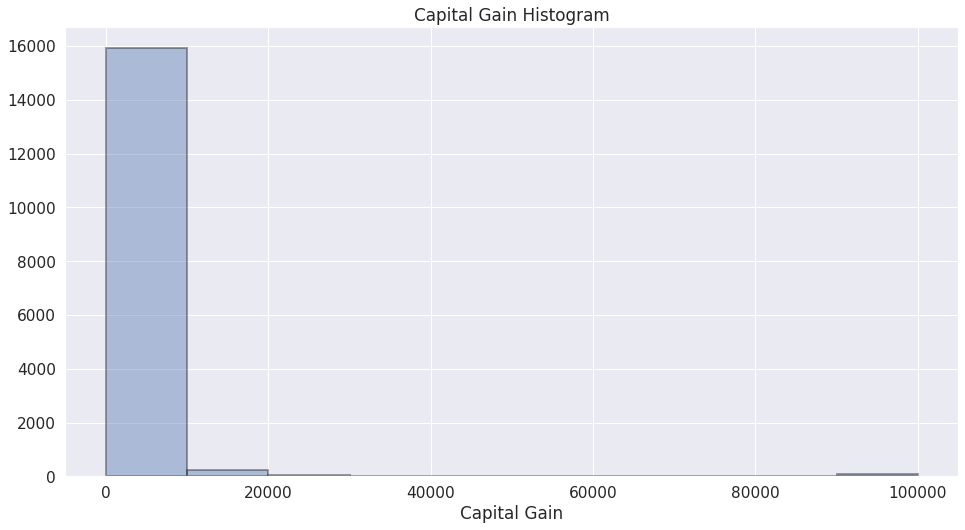

In [44]:
ax=sns.distplot(test['capital_gain'],bins=10,kde=False,hist_kws=dict(edgecolor="k", linewidth=2))
ax.set_title('Capital Gain Histogram')
ax.set_xlabel('Capital Gain')
plt.show()

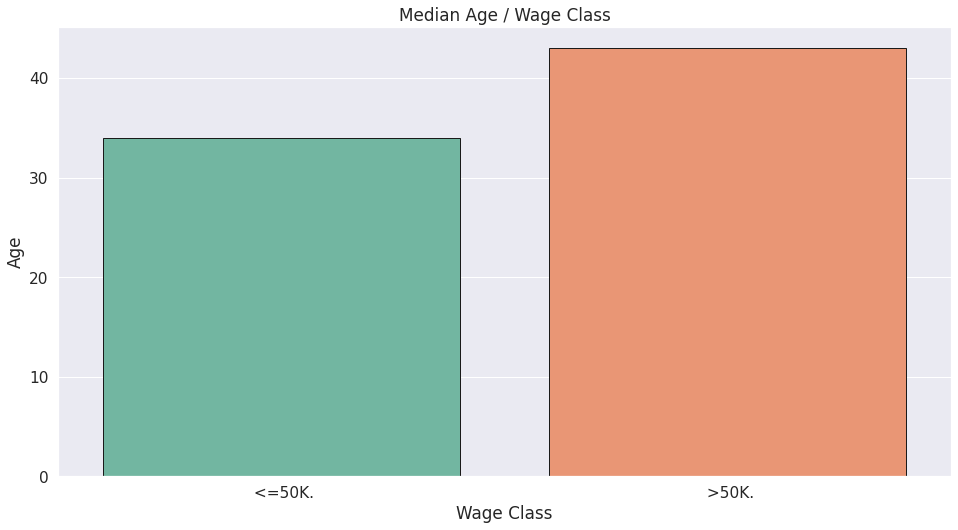

In [45]:
#median age for each wage_class
ax=sns.barplot(test.groupby('wage_class')['age'].median().index,test.groupby('wage_class')['age'].median().values,
               edgecolor='k', palette='Set2')
ax.set_ylabel('Age')
ax.set_xlabel('Wage Class')
ax.set_title('Median Age / Wage Class')
plt.show()

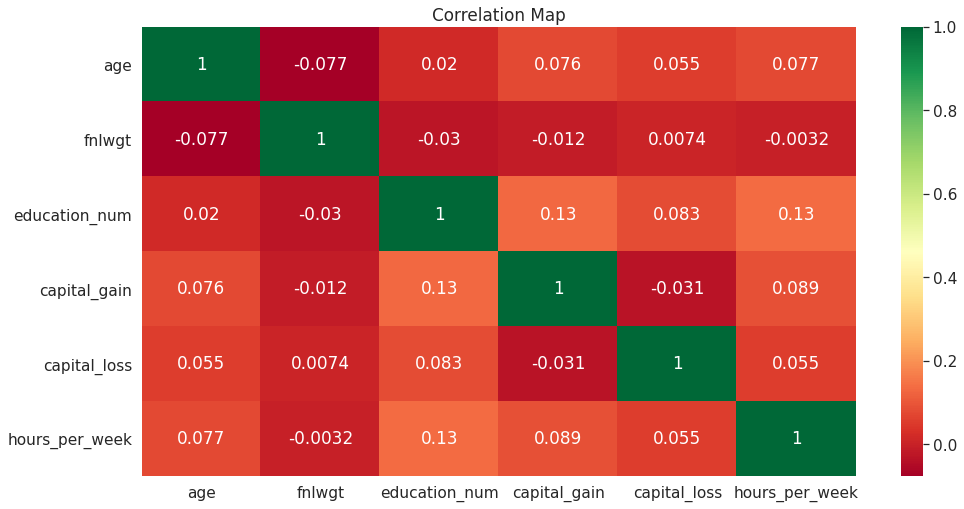

In [46]:
corr_test=test.copy()
for feature in categorical_features_test:
    corr_test.drop(feature,axis=1,inplace=True)

    
ax=sns.heatmap(corr_test.corr(), cmap='RdYlGn',annot=True)
ax.set_title('Correlation Map')
plt.show()

# Feature Engineering

In [47]:
#convert <=50K and >50K to 0, 1 respectively
encoder=LabelEncoder()
train['wage_class']=encoder.fit_transform(train['wage_class'])

In [48]:
categorical_features=[feature for feature in  train.columns if  train[feature].dtype=='O' and feature!='wage_class']
for feature in categorical_features:
    freq=train[feature].value_counts().rename_axis(feature).reset_index(name='frequency')
    print('\n')
    print(freq)



           workclass  frequency
0            Private      22696
1   Self-emp-not-inc       2541
2          Local-gov       2093
3                  ?       1836
4          State-gov       1298
5       Self-emp-inc       1116
6        Federal-gov        960
7        Without-pay         14
8       Never-worked          7


        education  frequency
0         HS-grad      10501
1    Some-college       7291
2       Bachelors       5355
3         Masters       1723
4       Assoc-voc       1382
5            11th       1175
6      Assoc-acdm       1067
7            10th        933
8         7th-8th        646
9     Prof-school        576
10            9th        514
11           12th        433
12      Doctorate        413
13        5th-6th        333
14        1st-4th        168
15      Preschool         51


           marital_status  frequency
0      Married-civ-spouse      14976
1           Never-married      10683
2                Divorced       4443
3               Separated       1

In [49]:
#transform country feature to be 1 if country is the United States. Otherwise is equal to 0
train['native_country']=np.where(train['native_country']==' United-States',1,0)

In [50]:
#transform marital status and concatenate some classes to reduce distinct classes
train['marital_status']=train['marital_status'].replace({' Married-civ-spouse': 'Married', ' Never-married': 'Single',  
                                                        ' Separated':'Divorced', ' Married-spouse-absent' : 'Divorced', 
                                                         ' Divorced':'Divorced', 
                                                         ' Married-AF-spouse' :'Divorced', ' Widowed':'Widowed' })

In [51]:
#transform workclass feature to be 1 if the workclass is Private and 0 if doesn't
train['workclass']=np.where(train['workclass']==' Private',1,0)

In [52]:
#transform workclass feature to be 1 if the Sex is Male and 0 if doesn't
train['sex']=np.where(train['sex']==' Male',1,0)

In [53]:
#transform workclass feature to be 1 if the Race is White and 0 if doesn't
train['race']=np.where(train['race']==' White',1,0)

In [54]:
#create ordered label for education 
education_mapping={' Preschool':0,' 1st-4th':1,' 5th-6th':2,' 7th-8th':3,' 9th':4,' 10th':5,
                   ' 11th':6,' 12th':7,' HS-grad':8,' Some-college':0,' Assoc-acdm':10,
                   ' Assoc-voc':11, ' Bachelors':12, ' Prof-school':13, ' Masters':14,' Doctorate':15
                   }
train['education']=train['education'].map(education_mapping)

In [55]:
relationship_ordered=train.groupby(['relationship'])['wage_class'].count().sort_values().index
relationship_ordered={k:i for i,k in enumerate(relationship_ordered,0)}
train['relationship']=train['relationship'].map(relationship_ordered)  

In [56]:
occupation_ordered=train.groupby(['occupation'])['wage_class'].count().sort_values().index
occupation_ordered={k:i for i,k in enumerate(occupation_ordered,0)}
train['occupation']=train['occupation'].map(occupation_ordered)

In [57]:
marital_ordered=train.groupby(['marital_status'])['wage_class'].count().sort_values().index
marital_ordered={k:i for i,k in enumerate(marital_ordered,0)}
train['marital_status']=train['marital_status'].map(marital_ordered)

In [58]:
train.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,0,77516,12,13,2,11,4,1,1,2174,0,40,1,0
1,50,0,83311,12,13,3,12,5,1,1,0,0,13,1,0
2,38,1,215646,8,9,1,5,4,1,1,0,0,40,1,0
3,53,1,234721,6,7,3,5,5,0,1,0,0,40,1,0
4,28,1,338409,12,13,3,14,1,0,0,0,0,40,0,0
5,37,1,284582,14,14,3,12,1,1,0,0,0,40,1,0
6,49,1,160187,4,5,1,9,4,0,0,0,0,16,0,0
7,52,0,209642,8,9,3,12,5,1,1,0,0,45,1,1
8,31,1,45781,14,14,2,14,4,1,0,14084,0,50,1,1
9,42,1,159449,12,13,3,12,5,1,1,5178,0,40,1,1


In [59]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [60]:
train.drop('fnlwgt',axis=1,inplace=True) # it is not a useful feature for predicting the wage class

In [61]:
#scaling the train set with StandardScaler
scaler=StandardScaler()
scaled_features_train=scaler.fit_transform(train.drop('wage_class',axis=1))
scaled_features_train=pd.DataFrame(scaled_features_train, columns=train.drop('wage_class',axis=1).columns)

In [62]:
#undersampling the train set
under=OneSidedSelection()
X_train_res, y_train_res=under.fit_resample(scaled_features_train, train['wage_class'])


#oversampling the train set
sm=SMOTE()
X_train_res, y_train_res= sm.fit_resample(X_train_res, y_train_res)

X_train_res=pd.DataFrame(X_train_res, columns=train.drop('wage_class',axis=1).columns)



#creating the final train 
final_train=pd.concat([X_train_res, y_train_res],axis=1)

In [63]:
final_train.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,-0.922393,-1.516792,1.053613,1.134739,-0.256985,1.268386,-0.568542,0.413020,0.703071,-0.145920,-0.21666,-0.035429,0.340954,0
1,0.030671,-1.516792,1.053613,1.134739,-0.256985,0.348115,0.167065,0.413020,0.703071,0.148453,-0.21666,-0.035429,0.340954,0
2,0.837109,-1.516792,1.053613,1.134739,0.924726,0.654872,0.902673,0.413020,0.703071,-0.145920,-0.21666,-2.222153,0.340954,0
3,-0.042642,0.659286,0.191706,-0.420060,-1.438697,-1.492427,0.167065,0.413020,0.703071,-0.145920,-0.21666,-0.035429,0.340954,0
4,1.057047,0.659286,-0.239247,-1.197459,0.924726,-1.492427,0.902673,-2.421192,0.703071,-0.145920,-0.21666,-0.035429,0.340954,0
5,-0.775768,0.659286,1.053613,1.134739,0.924726,1.268386,-2.039757,-2.421192,-1.422331,-0.145920,-0.21666,-0.035429,-2.932948,0
6,0.763796,0.659286,-0.670200,-1.974858,-1.438697,-0.265399,0.167065,-2.421192,-1.422331,-0.145920,-0.21666,-1.979184,-2.932948,0
7,-1.142331,0.659286,1.053613,1.134739,-0.256985,0.348115,-0.568542,0.413020,-1.422331,-0.145920,-0.21666,-0.845327,0.340954,0
8,-0.482518,0.659286,0.622659,0.746039,-0.256985,0.041358,0.167065,-2.421192,0.703071,-0.145920,-0.21666,0.774468,0.340954,0
9,-0.335892,0.659286,-0.885677,-2.363558,0.924726,-1.185670,0.902673,-2.421192,0.703071,-0.145920,-0.21666,0.369519,-2.932948,0


In [64]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47248 entries, 0 to 47247
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             47248 non-null  float64
 1   workclass       47248 non-null  float64
 2   education       47248 non-null  float64
 3   education_num   47248 non-null  float64
 4   marital_status  47248 non-null  float64
 5   occupation      47248 non-null  float64
 6   relationship    47248 non-null  float64
 7   race            47248 non-null  float64
 8   sex             47248 non-null  float64
 9   capital_gain    47248 non-null  float64
 10  capital_loss    47248 non-null  float64
 11  hours_per_week  47248 non-null  float64
 12  native_country  47248 non-null  float64
 13  wage_class      47248 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 5.0 MB


In [65]:
final_train['wage_class'].value_counts() #now train set is balanced

1    23624
0    23624
Name: wage_class, dtype: int64

###### Test Set

Now for the test set we have to apply all the transformations that we did before for the train set

In [66]:
test['wage_class']=np.where(test['wage_class']== ' >50K.',1,0)

In [67]:
test['wage_class'].value_counts()

0    12435
1     3846
Name: wage_class, dtype: int64

In [68]:
#transform country feature to be 1 if country is the United States. Otherwise is equal to 0
test['native_country']=np.where(test['native_country']==' United-States',1,0)

In [69]:
#transform workclass feature to be 1 if the workclass is Private and 0 if doesn't
test['workclass']=np.where(test['workclass']==' Private',1,0)

In [70]:
#transform workclass feature to be 1 if the Sex is Male and 0 if doesn't
test['sex']=np.where(test['sex']==' Male',1,0)

In [71]:
test['race']=np.where(test['race']==' White',1,0)

In [72]:
test['education']=test['education'].map(education_mapping)

In [73]:
test['relationship']=test['relationship'].map(relationship_ordered) 

In [74]:
test['occupation']=test['occupation'].map(occupation_ordered)

In [75]:
#transform marital status and concatenate some classes to reduce distinct classes
test['marital_status']=test['marital_status'].replace({' Married-civ-spouse': 'Married', ' Never-married': 'Single',  
                                                        ' Separated':'Divorced', ' Married-spouse-absent' : 'Divorced', 
                                                         ' Divorced':'Divorced', 
                                                         ' Married-AF-spouse' :'Divorced', ' Widowed':'Widowed' })

In [76]:
test['marital_status']=test['marital_status'].map(marital_ordered)

In [77]:
test.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,1,226802,6,7,2,8,3,0,1,0,0,40,1,0
1,38,1,89814,8,9,3,4,5,1,1,0,0,50,1,0
2,28,0,336951,10,12,3,2,5,1,1,0,0,40,1,1
3,44,1,160323,0,10,3,8,5,0,1,7688,0,40,1,1
4,18,0,103497,0,10,2,7,3,1,0,0,0,30,1,0
5,34,1,198693,5,6,2,9,4,1,1,0,0,30,1,0
6,29,0,227026,8,9,2,7,2,0,1,0,0,40,1,0
7,63,0,104626,13,15,3,14,5,1,1,3103,0,32,1,1
8,24,1,369667,0,10,2,9,2,1,0,0,0,40,1,0
9,55,1,104996,3,4,3,13,5,1,1,0,0,10,1,0


In [78]:
test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [79]:
test.drop('fnlwgt',axis=1,inplace=True)

In [80]:
scaled_features_test=scaler.transform(test.drop('wage_class',axis=1))
scaled_features_test=pd.DataFrame(scaled_features_test, columns=test.drop('wage_class',axis=1).columns)

final_test=pd.concat([scaled_features_test,test['wage_class']],axis=1)

In [81]:
final_test.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,-0.995706,0.659286,-0.239247,-1.197459,-0.256985,-0.572156,-0.568542,-2.421192,0.703071,-0.145920,-0.21666,-0.035429,0.340954,0
1,-0.042642,0.659286,0.191706,-0.420060,0.924726,-1.799184,0.902673,0.413020,0.703071,-0.145920,-0.21666,0.774468,0.340954,0
2,-0.775768,-1.516792,0.622659,0.746039,0.924726,-2.412698,0.902673,0.413020,0.703071,-0.145920,-0.21666,-0.035429,0.340954,1
3,0.397233,0.659286,-1.532107,-0.031360,0.924726,-0.572156,0.902673,-2.421192,0.703071,0.895083,-0.21666,-0.035429,0.340954,1
4,-1.508894,-1.516792,-1.532107,-0.031360,-0.256985,-0.878913,-0.568542,0.413020,-1.422331,-0.145920,-0.21666,-0.845327,0.340954,0
5,-0.335892,0.659286,-0.454724,-1.586158,-0.256985,-0.265399,0.167065,0.413020,0.703071,-0.145920,-0.21666,-0.845327,0.340954,0
6,-0.702455,-1.516792,0.191706,-0.420060,-0.256985,-0.878913,-1.304150,-2.421192,0.703071,-0.145920,-0.21666,-0.035429,0.340954,0
7,1.790173,-1.516792,1.269089,1.912138,0.924726,1.268386,0.902673,0.413020,0.703071,0.274245,-0.21666,-0.683348,0.340954,1
8,-1.069018,0.659286,-1.532107,-0.031360,-0.256985,-0.265399,-1.304150,0.413020,-1.422331,-0.145920,-0.21666,-0.035429,0.340954,0
9,1.203672,0.659286,-0.885677,-2.363558,0.924726,0.961629,0.902673,0.413020,0.703071,-0.145920,-0.21666,-2.465122,0.340954,0


# Feature Selection

In [82]:
X=final_train.drop('wage_class',axis=1)
y=final_train['wage_class']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [84]:
model=xgb.XGBClassifier()

In [85]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

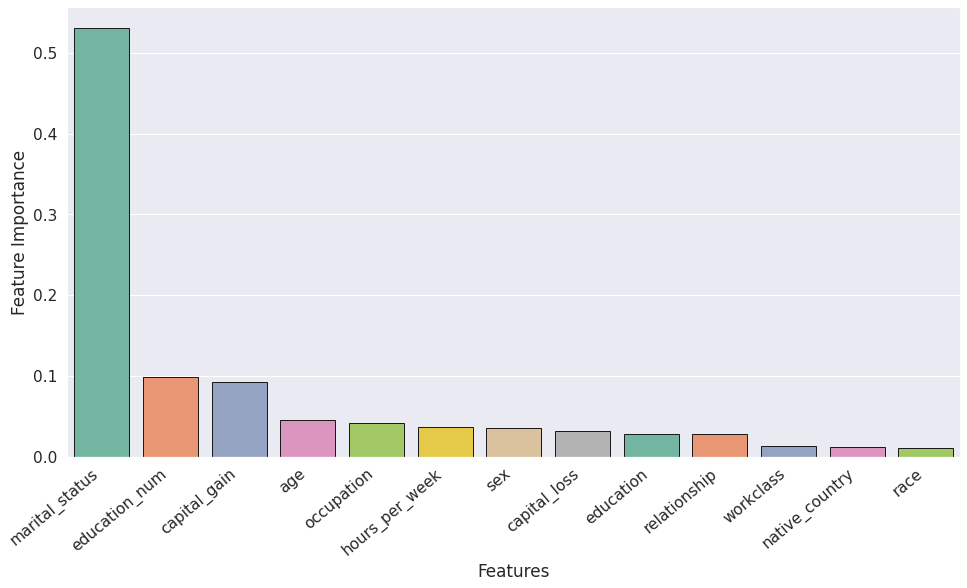

In [86]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances=feat_importances.nlargest(X_train.shape[1])
ax=sns.barplot(feat_importances.index, feat_importances.values ,edgecolor='k', palette='Set2')
ax.set_ylabel('Feature Importance')
ax.set_xlabel('Features')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

As we can see, Race, Workclass and Native Country are not important features and we will drop them

In [87]:
final_train.drop(['native_country','race','workclass'],axis=1,inplace=True)
final_test.drop(['native_country','race','workclass'],axis=1,inplace=True)

# Model Selection

#### XGBoost

In [88]:
xgb_classifier=xgb.XGBClassifier()
score_xgb=cross_val_score(xgb_classifier, X, y, cv=5, n_jobs=-1)

#### Random Forest

In [89]:
rf=RandomForestClassifier()
score_rf=cross_val_score(rf, X, y, cv=5, n_jobs=-1)

#### SVC

In [90]:
svc=SVC()
score_svc=cross_val_score(svc, X, y, cv=5, n_jobs=-1)

#### Logistic Regression

In [91]:
logReg=LogisticRegression()
score_logReg=cross_val_score(logReg, X, y, cv=5, n_jobs=-1)

#### KNN

In [92]:
knn=KNeighborsClassifier()
score_knn=cross_val_score(knn, X, y, cv=5, n_jobs=-1)

#### AdaBoost

In [93]:
adaboost=AdaBoostClassifier()
score_adaboost=cross_val_score(adaboost, X, y, cv=5, n_jobs=-1)

In [94]:
scores=pd.DataFrame({'Model':['XGBoost','Random Forest','SVC','Logistic Regression','KNN','Adaboost'],
                    'Accuracy':[score_xgb.mean(),score_rf.mean(),score_svc.mean(),score_logReg.mean(),score_knn.mean(),
                             score_adaboost.mean()]})

In [95]:
print(scores)

                 Model  Accuracy
0              XGBoost  0.899553
1        Random Forest  0.896484
2                  SVC  0.842639
3  Logistic Regression  0.818680
4                  KNN  0.862661
5             Adaboost  0.850068


# Final Model Evaluation

At this point we are going to evaluate the model in the initial test set

In [96]:
X_train=final_train.drop('wage_class',axis=1)
y_train=final_train['wage_class']

X_test=final_test.drop('wage_class',axis=1)
y_test=final_test['wage_class']

In [97]:
xgb_classifier.fit(X_train,y_train)
y_pred=xgb_classifier.predict(X_test)

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     12435
           1       0.68      0.76      0.72      3846

    accuracy                           0.86     16281
   macro avg       0.80      0.82      0.81     16281
weighted avg       0.87      0.86      0.86     16281



In [99]:
xgboost_auc=roc_auc_score(y_test,y_pred)
r_probs = [0 for _ in range(len(y_test))]
random_auc = roc_auc_score(y_test, r_probs)
print(xgboost_auc)

0.8248477104343522


In [100]:
probs=xgb_classifier.predict_proba(X_test)

In [101]:
probs=probs[:,1] #keep probabilities for one class

In [102]:
r_fpr, r_tpr, _=roc_curve(y_test,probs)
x=np.arange(0,1.01,0.01)

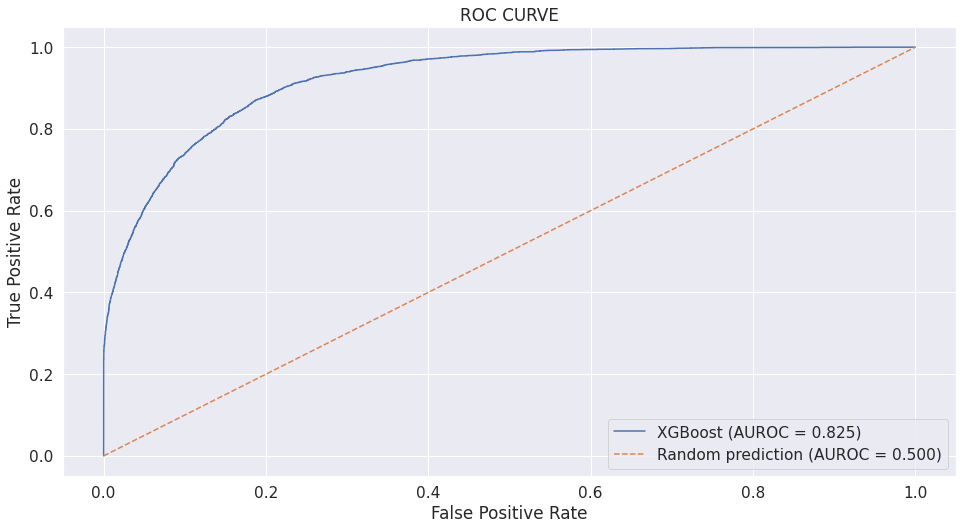

In [103]:
plt.plot(r_fpr, r_tpr, label='XGBoost (AUROC = %0.3f)' % xgboost_auc)
plt.plot(x,x, linestyle='--', label='Random prediction (AUROC = %0.3f)' % random_auc)
plt.legend()
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()